<a href="https://colab.research.google.com/github/sijuswamy/RCOEM_Session/blob/main/Computational_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Statistics using `Python`

In this lesson, you will discover the Gaussian distribution for data and how to calculate simple descriptive statistics. A sample of data is a snapshot from a broader population of all possible  observations that could be taken from a domain or generated by a process.

Interestingly, many observations fit a common pattern or distribution called the normal distribution, or more formally, the Gaussian distribution. It is the bell-shaped distribution that you may be familiar with.

A lot is known about the Gaussian distribution, and as such, there are whole sub-fields of statistics and statistical methods that can be used with Gaussian data. Any Gaussian distribution, and in turn any data sample drawn from a Gaussian distribution, can be summarized with just two parameters:

**Mean:** The central tendency or most likely value in the distribution (the top of the bell).

**Variance:** The average difference that observations have from the mean value in the distribution (the spread).

The units of the mean are the same as the units of the distribution, although the units of the variance are squared, and therefore harder to interpret. A popular alternative to the variance parameter is the standard deviation, which is simply the square root of the variance, returning the units to be the same as those of the distribution.

The mean, variance, and standard deviation can be calculated directly on data samples in `NumPy`.

The example below generates a sample of 1000 random numbers drawn from a Gaussian distribution with a known mean of 10 and a standard deviation of 2 and calculates the summary statistics.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# seed the random number generator
np.random.seed(1)
# generate univariate observations
data = 2 * np.random.randn(1000) + 10

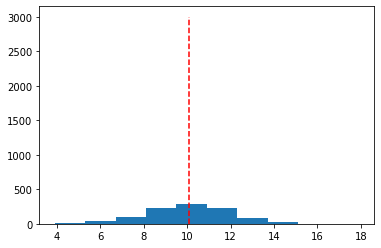

In [ ]:
# calculate summary stats
# from numpy.random import seed
# from numpy.random import randn
# from numpy import mean
# from numpy import var
# from numpy import std
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# seed the random number generator
np.random.seed(1)
# generate univariate observations
data = 2 * np.random.randn(1000) + 10
plt.hist(data)
plt.vlines(x=np.mean(data),ymin=0,ymax=3000,linestyles='dashed',colors='red')
plt.show()

In [ ]:
print(np.mean(data))

10.077624952319201


In [ ]:
# calculate statistics
print('Mean: %.3f' % np.mean(data))
print('Variance: %.3f' % np.var(data))
print('Standard Deviation: %.3f' % np.std(data))

Mean: 10.078
Variance: 3.849
Standard Deviation: 1.962


### Correlation Between Variables
In this lesson, you will discover how to calculate a correlation coefficient to quantify the relationship between two variables.

Variables in a dataset may be related for lots of reasons.

It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease.

Positive Correlation: Both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: Variables change in opposite directions.
The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

We can quantify the relationship between samples of two variables using a statistical method called Pearson’s correlation coefficient, named for the developer of the method, Karl Pearson.

The `pearsonr()` `NumPy` function can be used to calculate the Pearson’s correlation coefficient for samples of two variables.

The complete example is listed below showing the calculation where one variable is dependent upon the second.

In [ ]:
from scipy.stats import pearsonr
# seed random number generator
np.random.seed(1)
# prepare data
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)
# calculate Pearson's correlation
corr, p = pearsonr(data1, data2)
# display the correlation
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


In [ ]:
print(p)

0.0


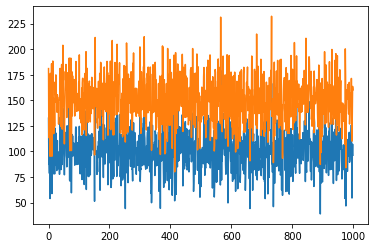

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data1)
plt.plot(data2)
plt.show()

## Statistical Hypothesis Tests

A widely used statistical hypothesis test is the Student’s t-test for comparing the mean values from two independent samples.

The default assumption is that there is no difference between the samples, whereas a rejection of this assumption suggests some significant difference. The tests assumes that both samples were drawn from a Gaussian distribution and have the same variance.

The Student’s t-test can be implemented in `Python` via the `ttest_ind()` `SciPy` function.

Below is an example of calculating and interpreting the Student’s t-test for two data samples that are known to be different.

In [ ]:
from scipy.stats import ttest_ind
np.random.seed(1)
# generate two independent samples
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51
# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-2.262, p=0.025
Different distributions (reject H0)


## Plotting means along with the random distributions

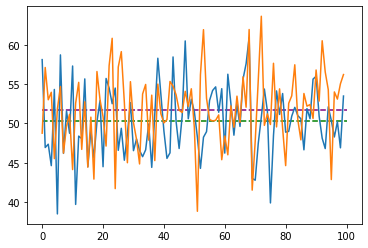

In [ ]:
plt.plot(data1)
plt.plot(data2)
plt.hlines(np.mean(data1),xmin=0,xmax=100,linestyles='dashed',colors='green')
plt.hlines(np.mean(data2),xmin=0,xmax=100,linestyles='dashed',colors='purple')
plt.show()

## Illustrating Statistics in Machine Learning with Built-in Data simulator

Note that in this example synthetic dataset is used. The `make_classification()` function (from `sklearn`) can be used to create synthetic classification problems. In this case, we will create 1,000 examples for a binary classification problem (about 500 examples per class). We will then split the dataset into a train and test sets of equal size in order to fit and evaluate the model.

In [ ]:
# step-1 loading required functions and libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [ ]:
#print(X)
print(y)

[0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1
 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 0 1 1 1 0 1 0 1 0 1 

In [ ]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [ ]:
# create a binary clssification model and fit the model
model = LogisticRegression(solver='lbfgs',verbose=1)
model.fit(trainX, trainy)#train the model with training data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [ ]:
predictions = model.predict(testX)

In [ ]:
print(predictions)

[1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1
 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0
 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1
 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0
 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 1 0 1 1 1 0 1 1 0 

In [ ]:
# predict probabilities
yhat = model.predict_proba(testX)

In [ ]:
print(yhat)

[[4.02731514e-03 9.95972685e-01]
 [2.00515726e-03 9.97994843e-01]
 [9.94701169e-01 5.29883066e-03]
 [8.47625806e-01 1.52374194e-01]
 [1.66665036e-03 9.98333350e-01]
 [4.99938552e-01 5.00061448e-01]
 [9.80236861e-01 1.97631392e-02]
 [9.76536616e-01 2.34633843e-02]
 [1.79993032e-02 9.82000697e-01]
 [2.93534820e-01 7.06465180e-01]
 [9.95837980e-01 4.16201961e-03]
 [2.53553400e-01 7.46446600e-01]
 [9.92334325e-01 7.66567488e-03]
 [3.80412811e-02 9.61958719e-01]
 [6.47854323e-02 9.35214568e-01]
 [1.92346446e-01 8.07653554e-01]
 [8.55196114e-01 1.44803886e-01]
 [4.34676792e-02 9.56532321e-01]
 [8.43042493e-01 1.56957507e-01]
 [5.50912415e-02 9.44908759e-01]
 [1.32992380e-01 8.67007620e-01]
 [5.89717936e-01 4.10282064e-01]
 [9.79518433e-01 2.04815673e-02]
 [3.32906248e-01 6.67093752e-01]
 [9.95736653e-01 4.26334713e-03]
 [4.33055309e-02 9.56694469e-01]
 [3.07422638e-01 6.92577362e-01]
 [5.59324053e-03 9.94406759e-01]
 [9.75084001e-01 2.49159988e-02]
 [4.49457316e-01 5.50542684e-01]
 [2.077854

In [ ]:
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

In [ ]:
print(pos_probs)

[9.95972685e-01 9.97994843e-01 5.29883066e-03 1.52374194e-01
 9.98333350e-01 5.00061448e-01 1.97631392e-02 2.34633843e-02
 9.82000697e-01 7.06465180e-01 4.16201961e-03 7.46446600e-01
 7.66567488e-03 9.61958719e-01 9.35214568e-01 8.07653554e-01
 1.44803886e-01 9.56532321e-01 1.56957507e-01 9.44908759e-01
 8.67007620e-01 4.10282064e-01 2.04815673e-02 6.67093752e-01
 4.26334713e-03 9.56694469e-01 6.92577362e-01 9.94406759e-01
 2.49159988e-02 5.50542684e-01 7.92214513e-01 8.15242298e-01
 8.18291856e-02 8.23317999e-01 1.53516867e-02 7.98798532e-02
 9.87551937e-01 9.36923464e-01 9.86339822e-01 3.19318661e-01
 9.82576369e-03 3.82722802e-02 9.83635286e-02 9.83780221e-01
 6.53737641e-03 5.29530623e-01 5.01616608e-01 9.97760930e-01
 8.40960809e-03 1.42082825e-01 2.21934800e-02 6.47786780e-01
 9.79115074e-01 2.32942383e-01 5.09205311e-02 9.03776284e-01
 6.20807462e-02 6.78015442e-02 5.45950280e-02 6.18886716e-01
 8.53405992e-01 4.75728835e-02 6.03026960e-01 2.87845483e-02
 3.53877982e-02 1.228595

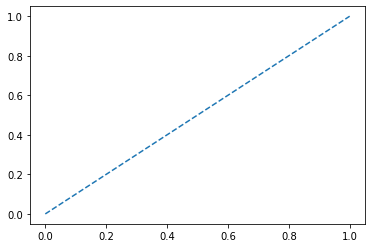

In [ ]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

In [ ]:
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)

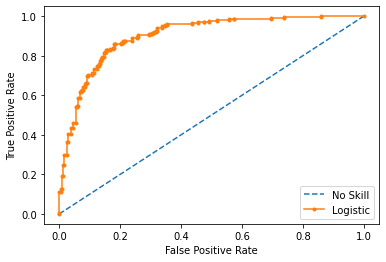

In [ ]:
# plot model roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
roc_auc = roc_auc_score(testy, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

Logistic ROC AUC 0.903


In [ ]:
# Use score method to get accuracy of model
score = model.score(testX, testy)
print(score)

0.834


In [ ]:
#confusion matrix
cm = metrics.confusion_matrix(testy, predictions)
print(cm)

[[197  43]
 [ 40 220]]


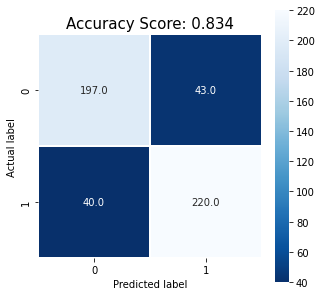

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
#calculating model evaluation metrics
TP=cm[0,0]
FN=cm[0,1]
FP=cm[1,0]
TN=cm[1,1]
Sensitivity=TP/(TP+FN)
Specificity=TN/(FP+TN)
Precision=TP/(TP+FP)
Recall=Sensitivity
GM=np.sqrt(Sensitivity*Specificity)
F=(2*Precision*Recall)/(Precision+Recall)

In [ ]:
print("Sensitivity:%.3f"%Sensitivity)
print("Specificity:%.3f"%Specificity)
print("Geometric mean:%.3f"%GM)
print("Precision:%.3f"%Precision)
print("Recall:%.3f"%Sensitivity)
print("F-value:%.3f"%F)






Sensitivity:0.821
Specificity:0.846
Geometric mean:0.833
Precision:0.831
Recall:0.821
F-value:0.826


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(testy, predictions)

0.8413001912045889